In [37]:
# loading libraries
import torch
import torch.nn as nn
from Torch_Basics.res.plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# set style 
set_default()

In [23]:
device = "cpu"

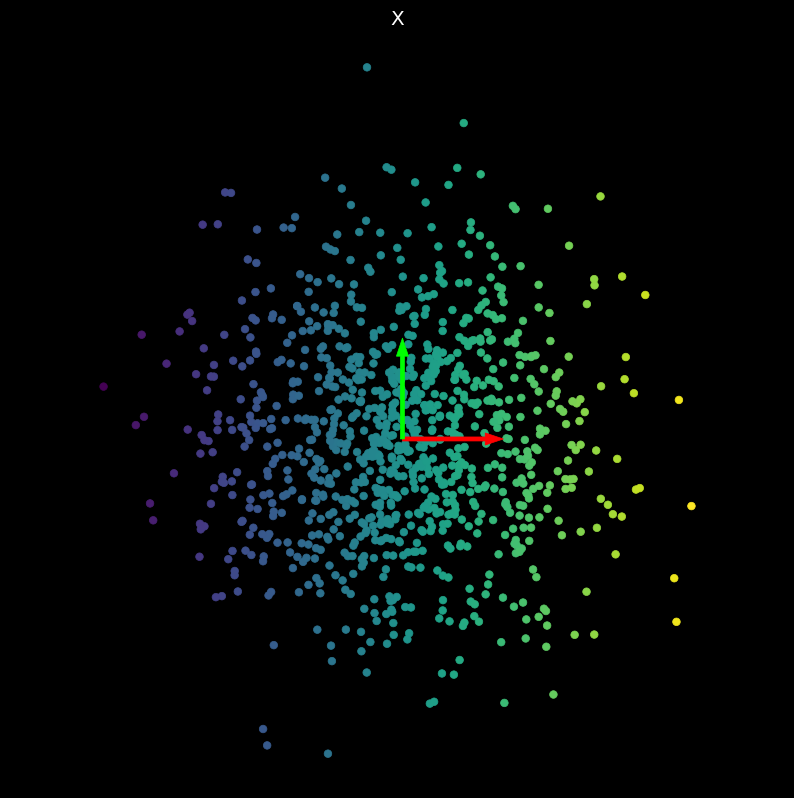

In [24]:
# generating some points in 2D space
n_points = 1000
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]

show_scatterplot(X, colors, title = 'X')
OI = torch.cat((torch.zeros(2,2), torch.eye(2)))
plot_bases(OI)

Visualizing Linear Transformations
- Generate a random matrix $W$   

$
\begin{equation}
    W = U
  \left[ {\begin{array}{cc}
   s_1 &amp; 0 \\
   0 &amp; s_2 \\
  \end{array} } \right]
  V^\top
\end{equation}
$  
  
$ SVD$  
$ W = (orthogonal) (diagonal) (orthogonal)$
- Compute $y = Wx$
- Larger singular values stretch the points
- Smaller singular values push them together
$U, V$ rotate/reflect

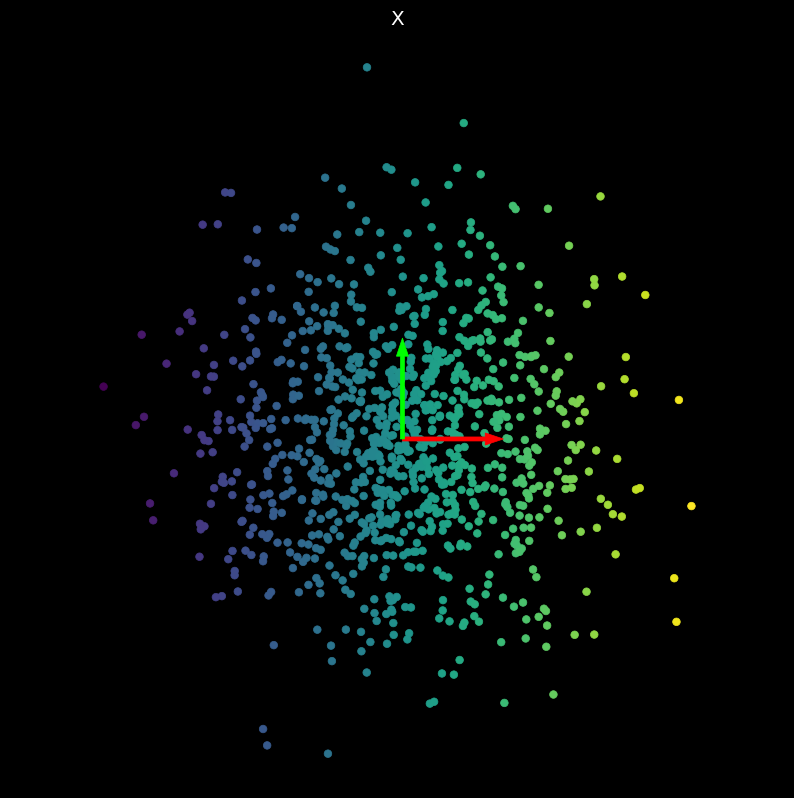

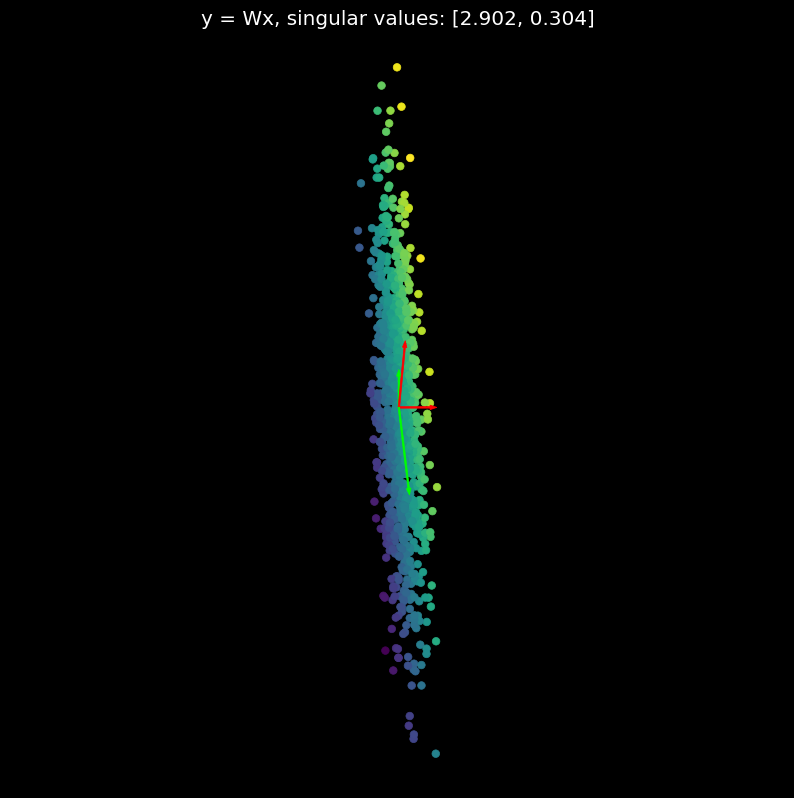

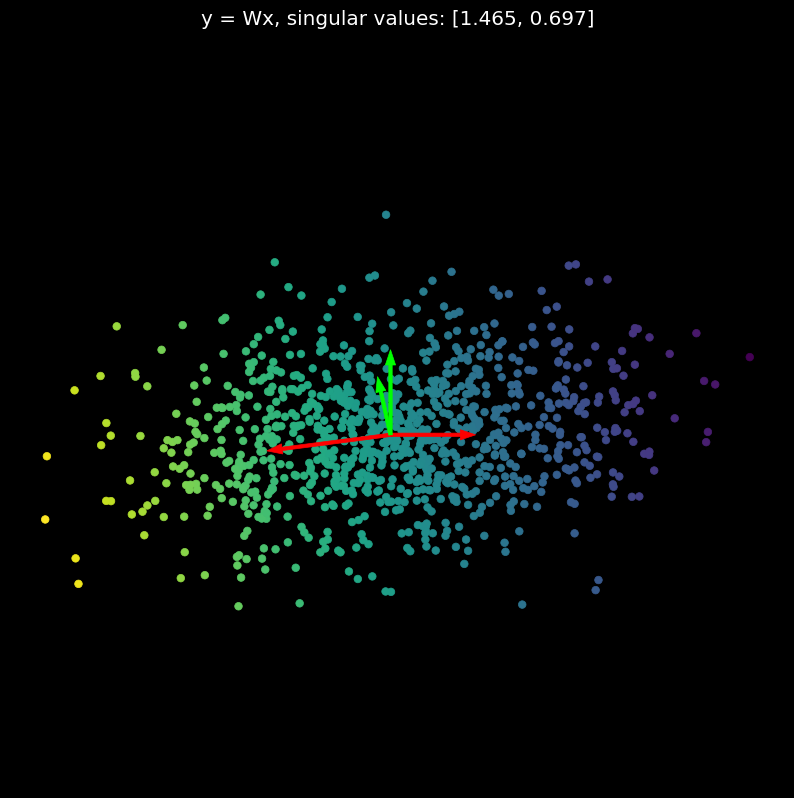

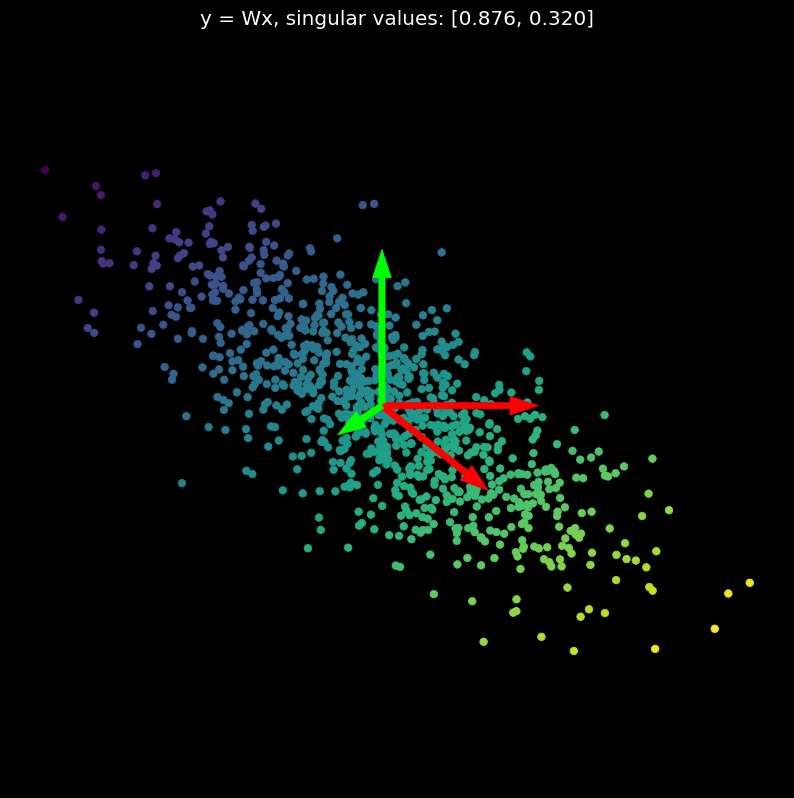

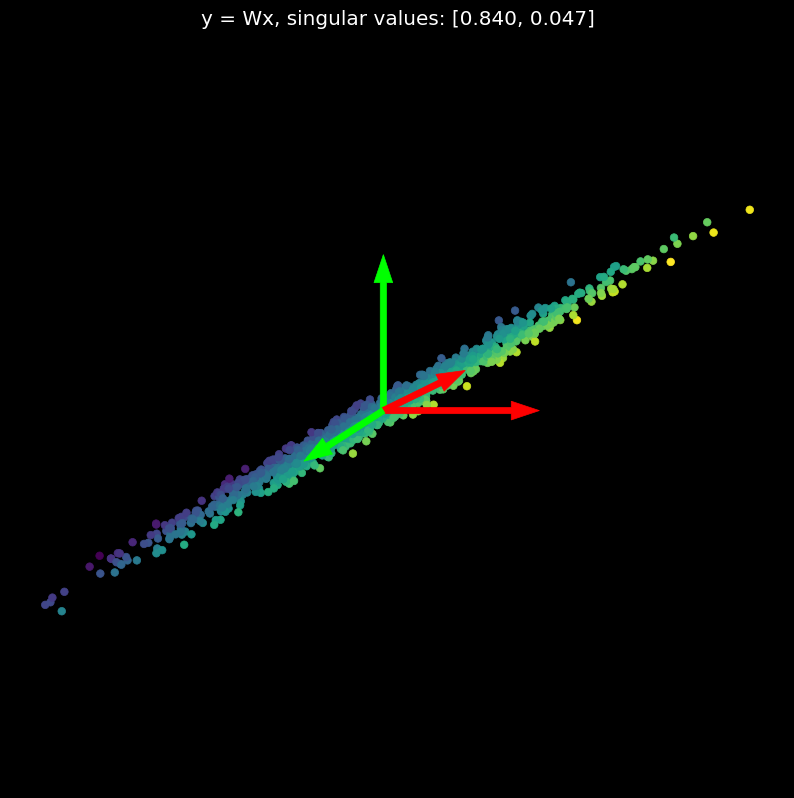

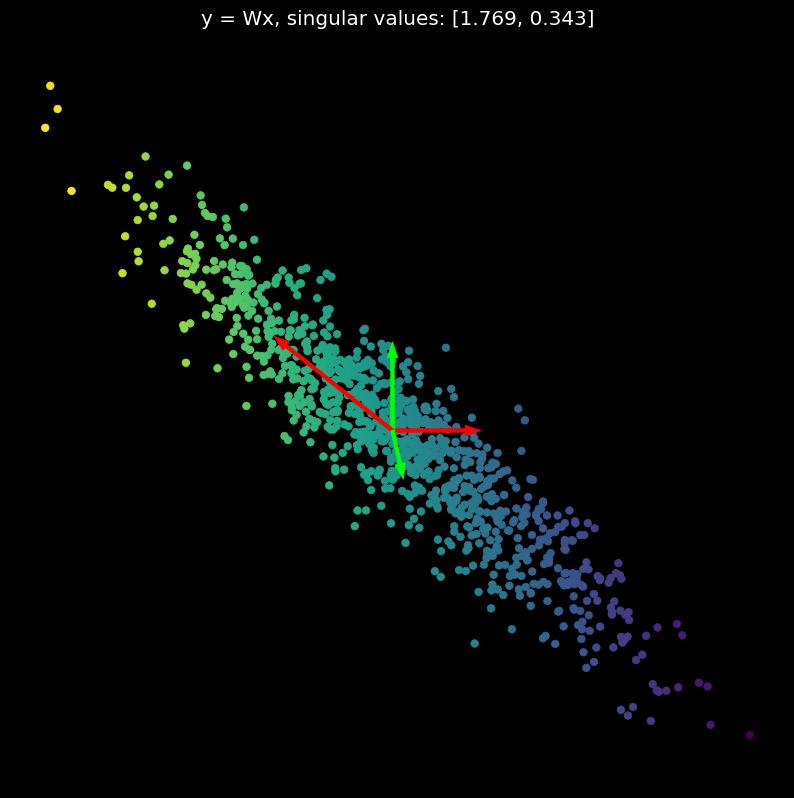

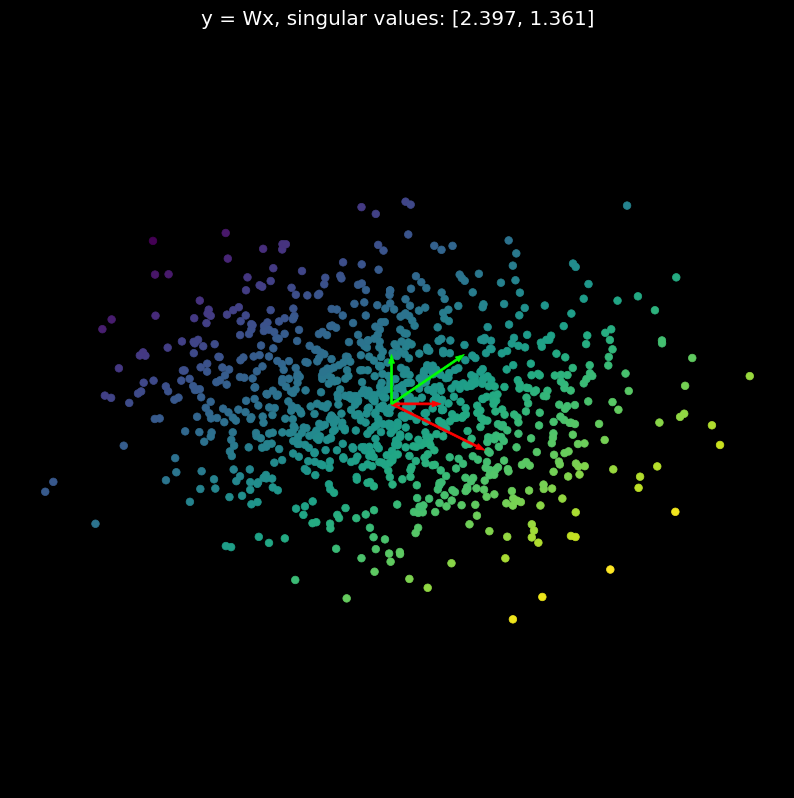

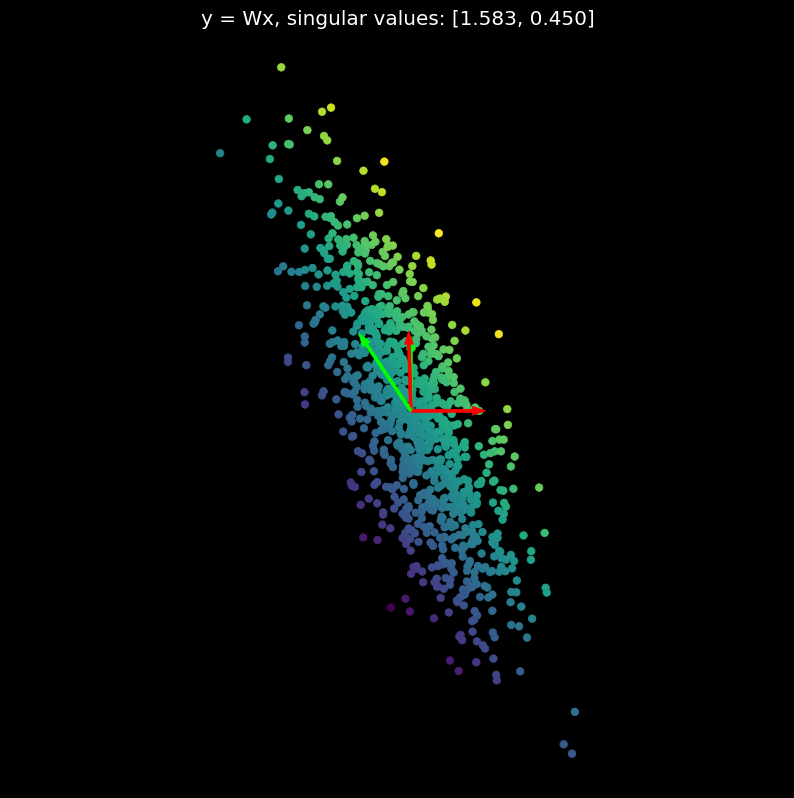

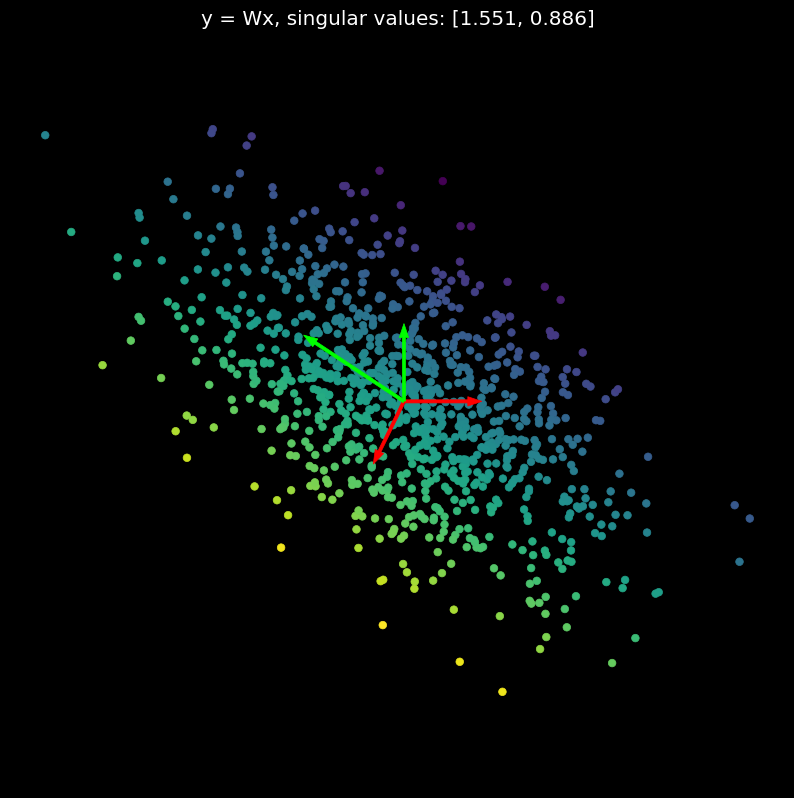

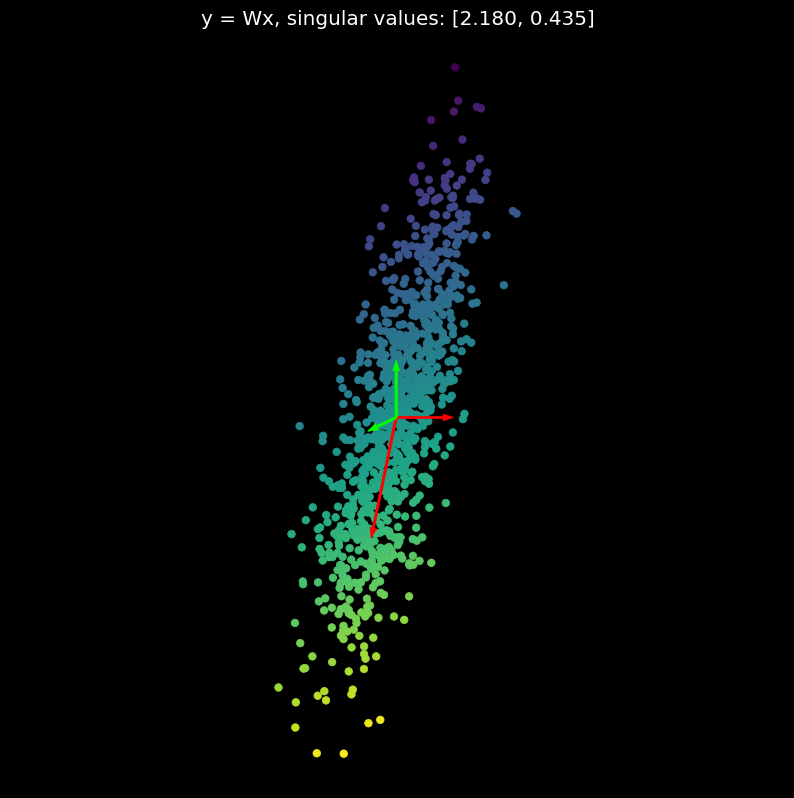

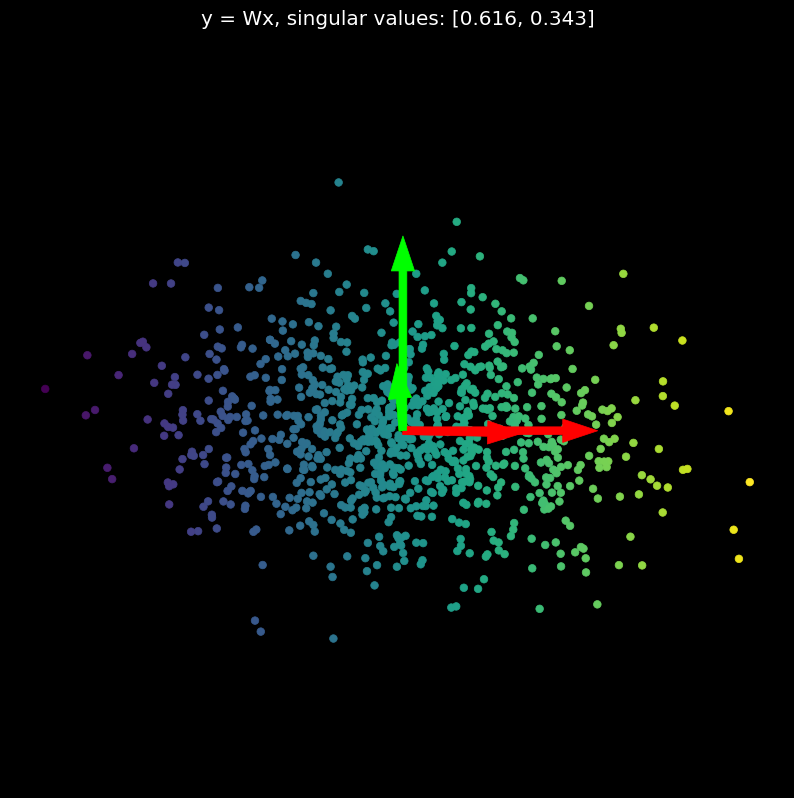

In [78]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

for i in range(10):
    # creating the random matrix W
    W = torch.randn(2, 2).to(device)
    # transforming the points
    Y = X @ W.t()
    # computing singular values
    U, S, V = torch.svd(W)
    # plotting transformed points
    show_scatterplot(Y, colors, title='y = Wx, singular values: [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    # transforms the basis
    new_OI = OI @ W.t()
    # plotting old and new basis
    plot_bases(OI)
    plot_bases(new_OI)



## Linear Transformation with PyTorch

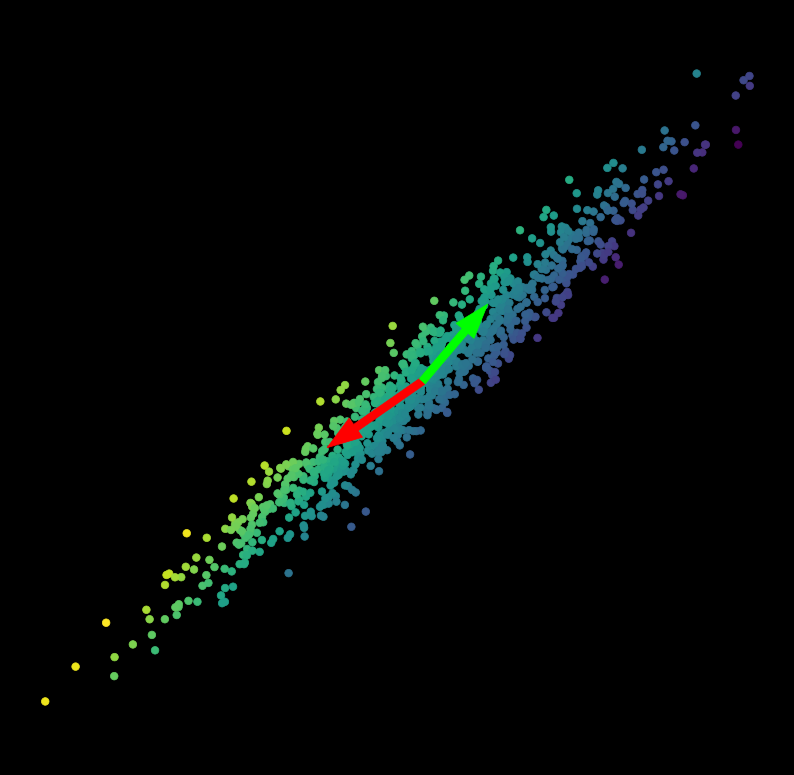

In [80]:
model = nn.Sequential(
                    nn.Linear(2, 2, bias= False)
                    )
model.to(device)

with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y, colors)
    plot_bases(model(OI))

## Non-Linear Transform: Map Points to a Square

- Linear transforms can rotate, reflect, stretch and compress, but cannot curve
- We need non-linearities for this
- Can (approximately) map points to a square by first stretching out by a factor $s$, then squashing with a tanh function
  
$
   f(x)= \tanh \left(
  \left[ {\begin{array}{cc}
   s &amp; 0 \\
   0 &amp; s \\
  \end{array} } \right]  
  x
  \right)
$

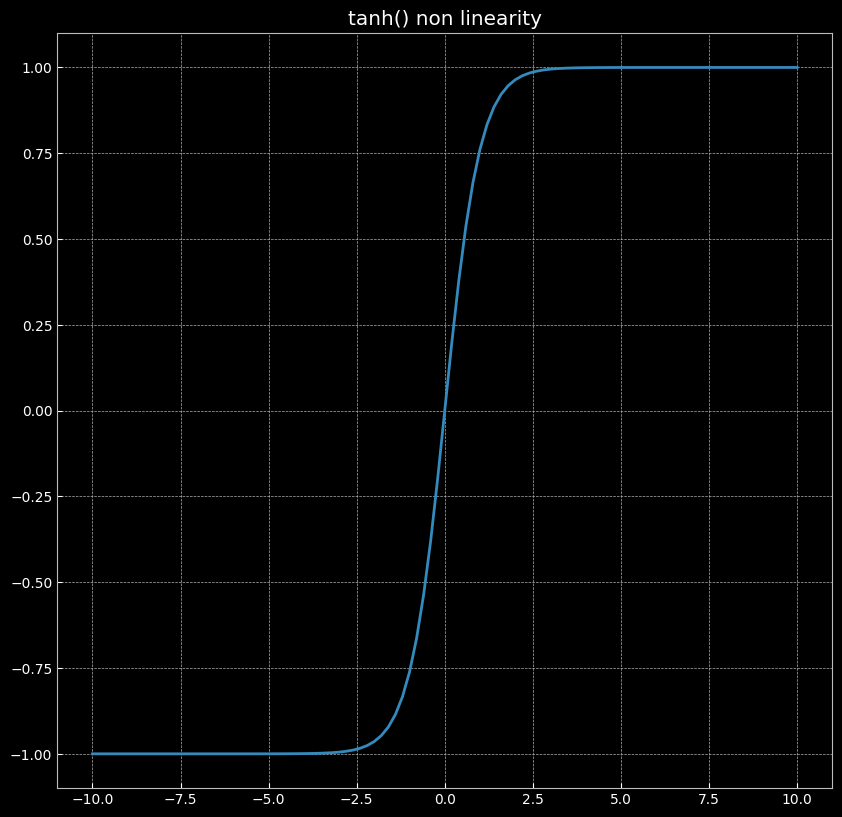

In [82]:
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)

plot(z.numpy(), s.numpy())
title('tanh() non linearity');

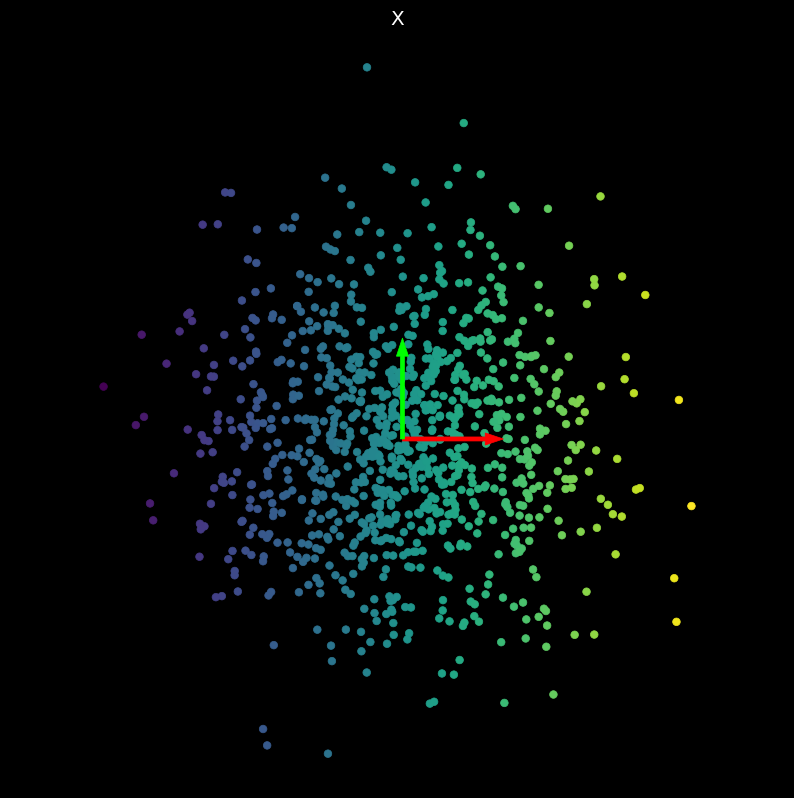

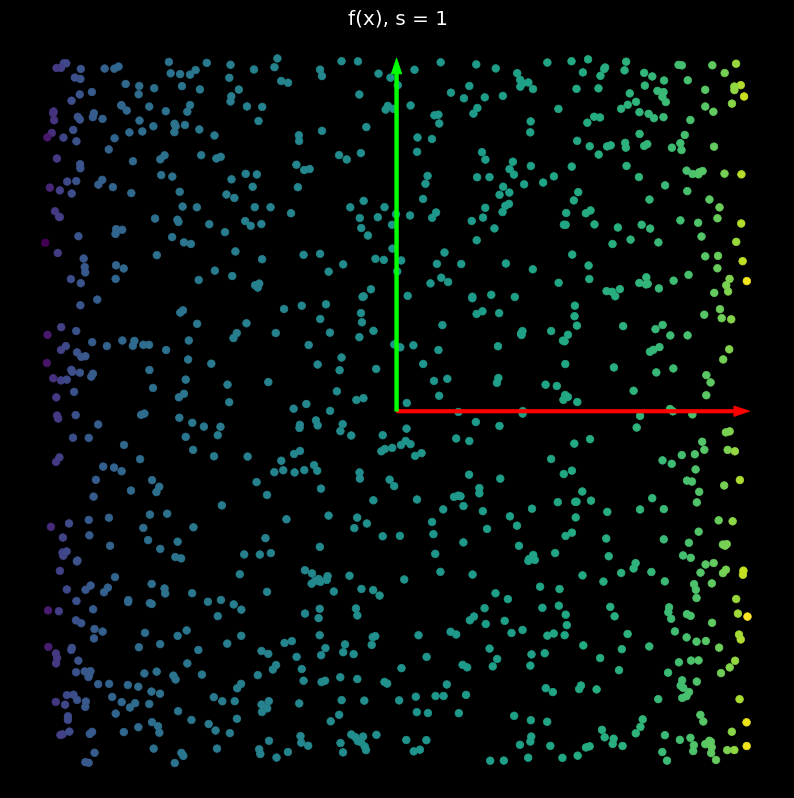

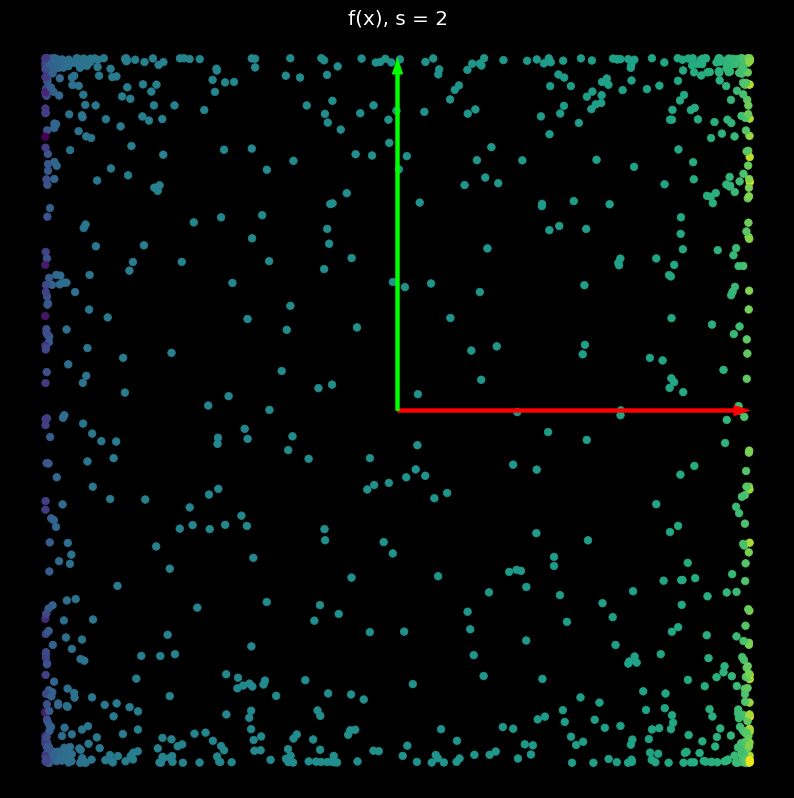

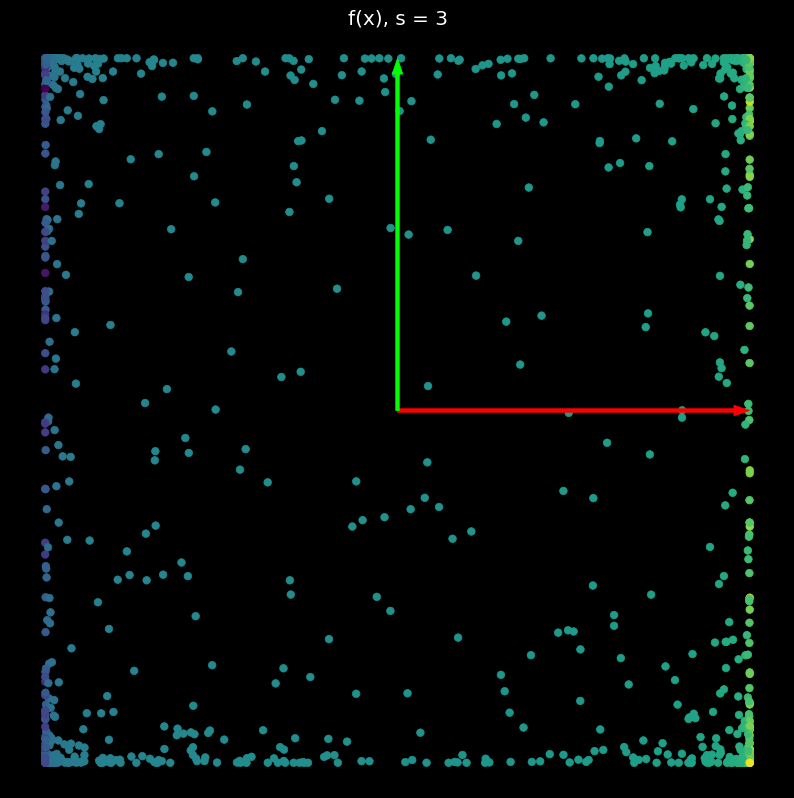

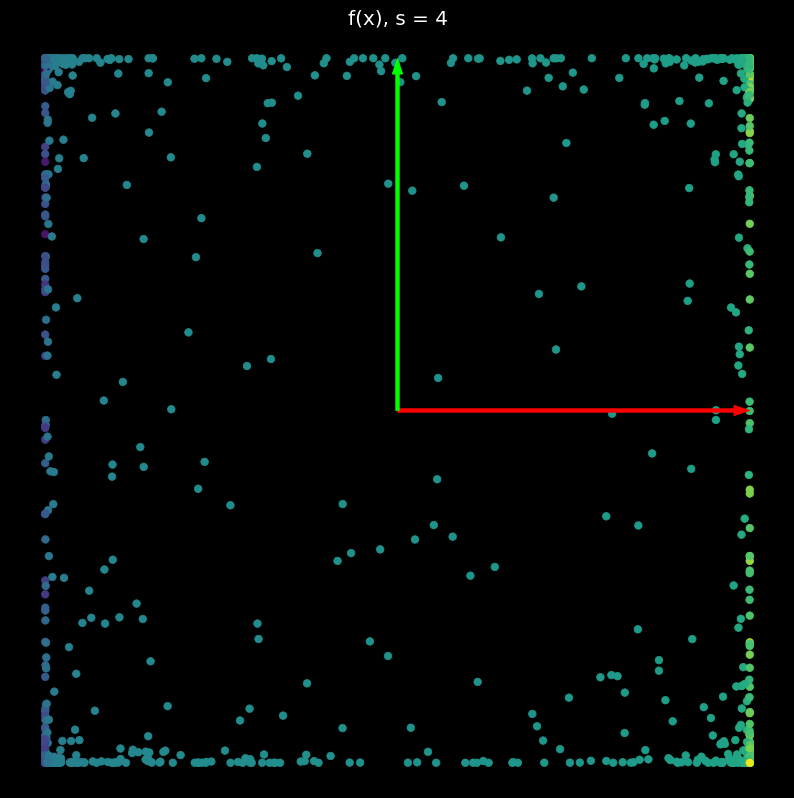

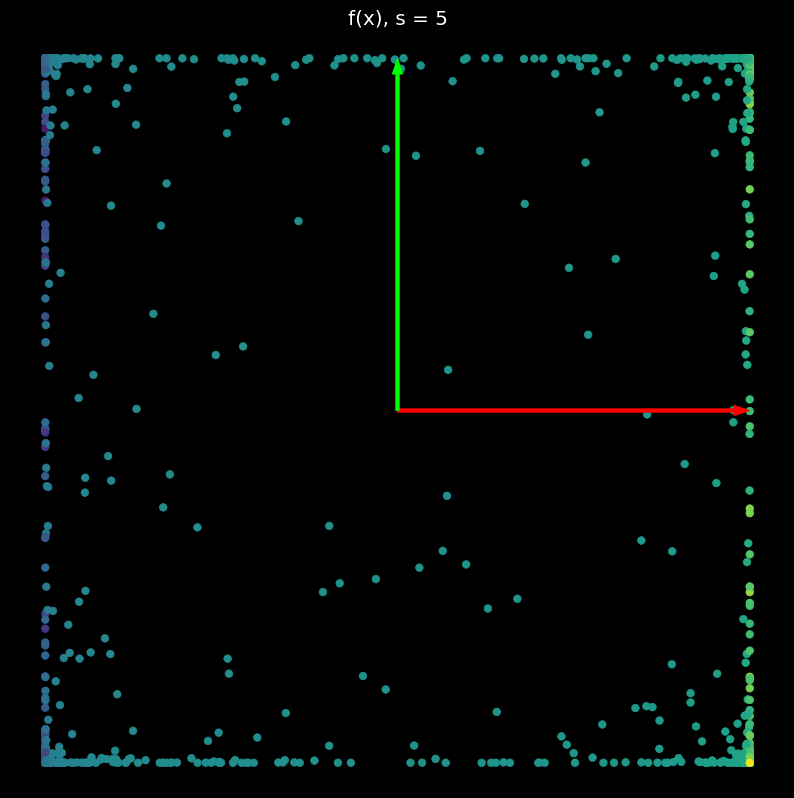

In [87]:
show_scatterplot(X, colors, title = 'X')
plot_bases(OI)

model = nn.Sequential(
                    nn.Linear(2, 2, bias = False), 
                    nn.Tanh()
                    )

model.to(device)

for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, colors, title = f'f(x), s = {s}')
    plot_bases(OI, width = 0.01)


## Visualize Functions Represented by Random Neural Networks

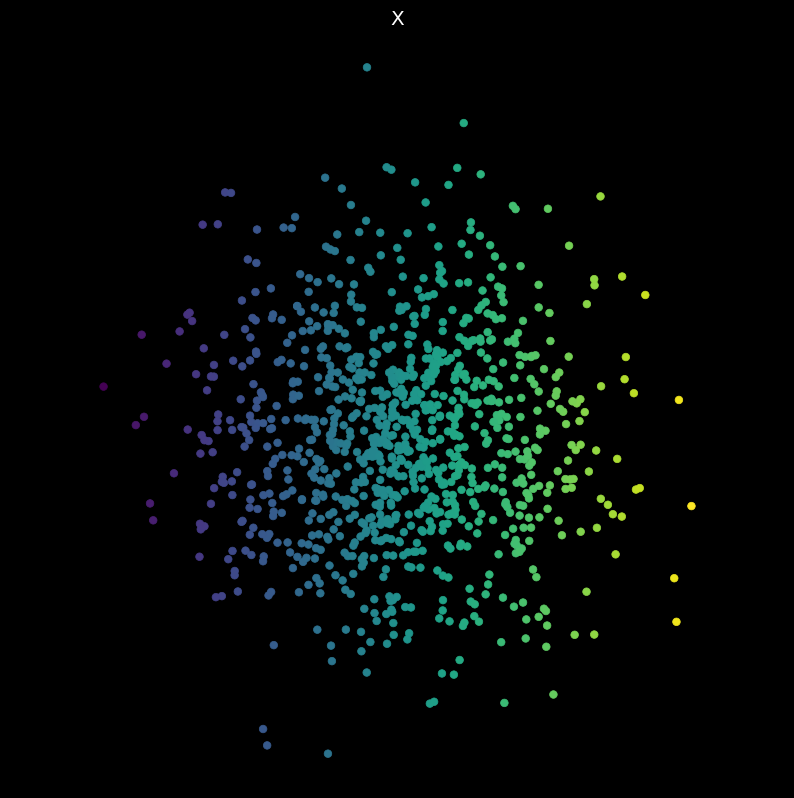

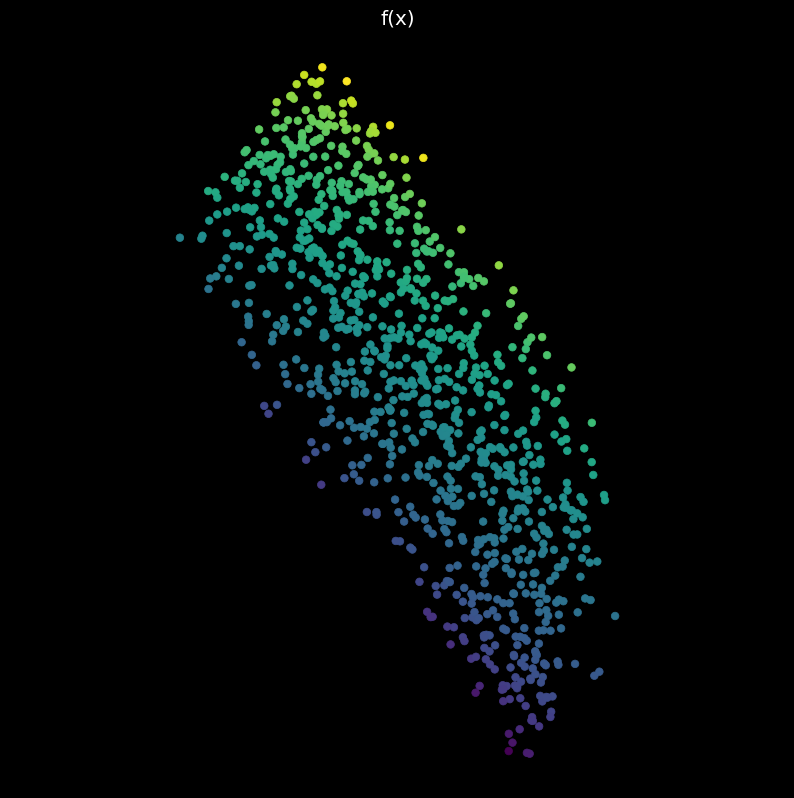

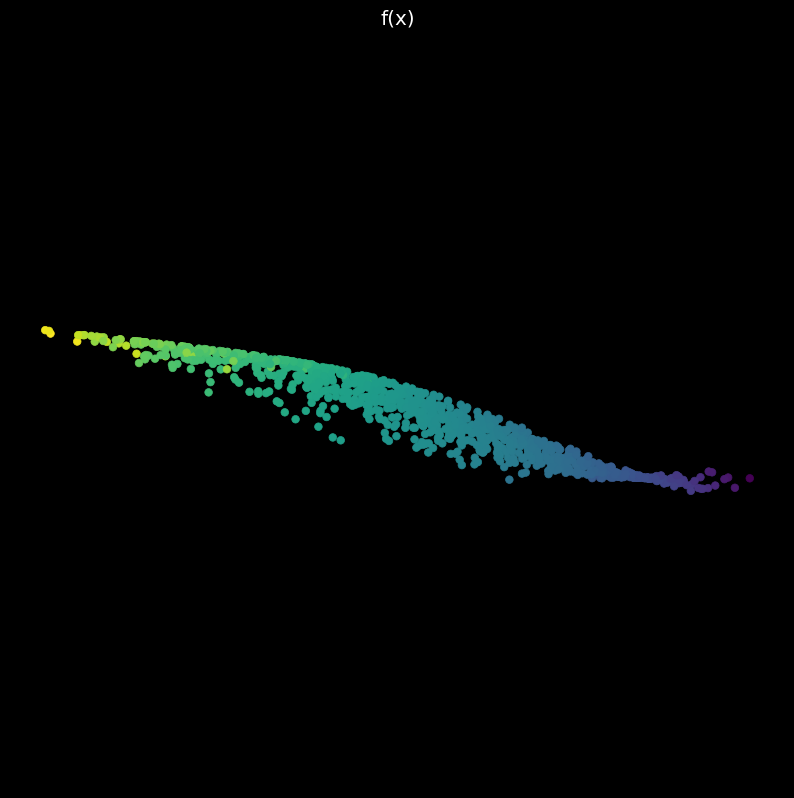

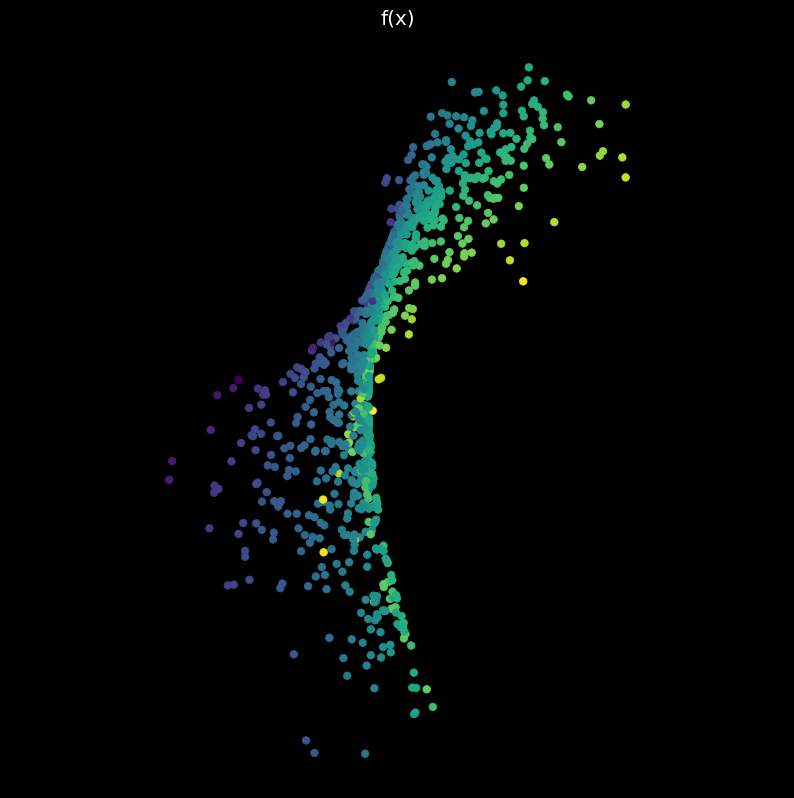

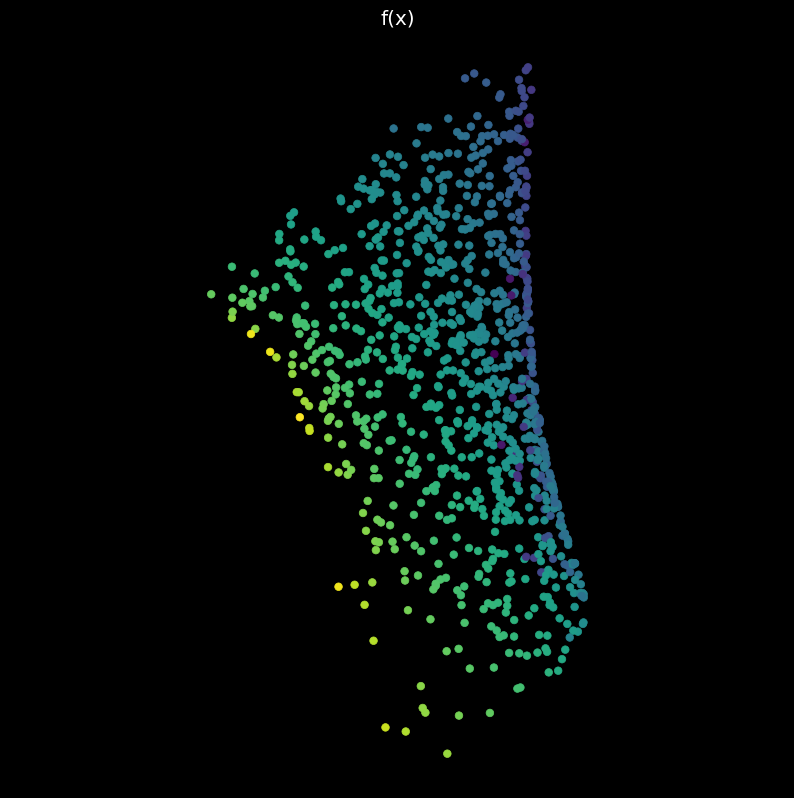

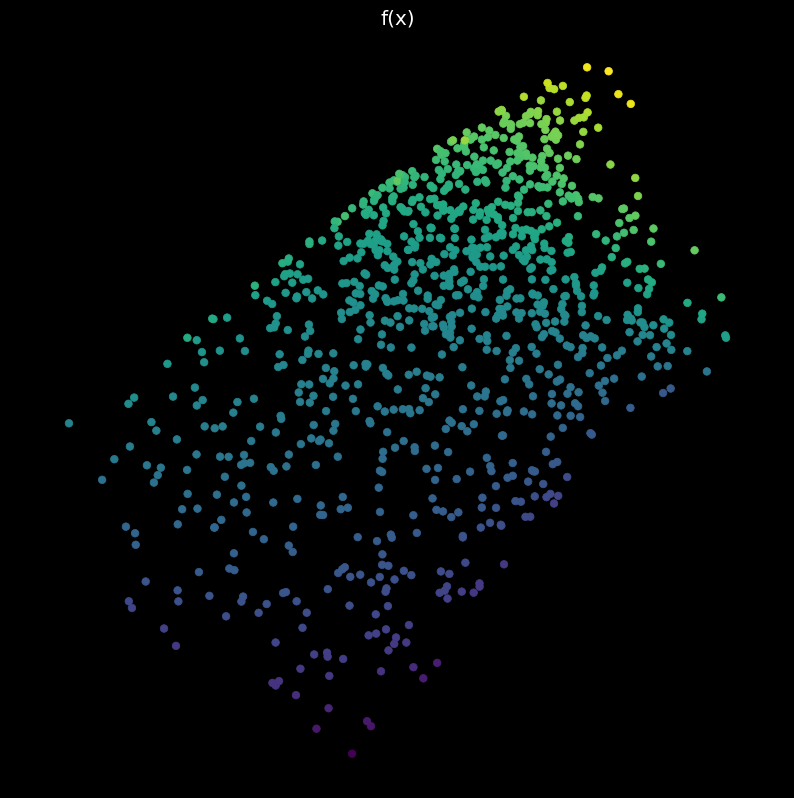

In [92]:
show_scatterplot(X, colors, title = 'X')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    # creating 1 layer neural networks with random weights
    model = nn.Sequential(
                        nn.Linear(2, n_hidden),
                        NL,
                        nn.Linear(n_hidden, 2)
                        )
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title = 'f(x)')